# Visualizations about the datasets
This dataset covers  **`190 countries`** around the world (~about **`1100 cities`**) with over than **`73000 hotels`**. Each hotel includes around **`400 features`**.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from collections import Counter

## 1. Hotels Features Dataset

In [2]:
def split_data(data):
    features_string = ''
    for row in data:
        features_string += str(row)
    return list(features_string.split(","))
        
def most_common(seq):
    data = split_data(seq)
    most_common_counter = Counter(data)
    most_common = most_common_counter.most_common(20)
    return [country for country, _ in most_common],  [count for _, count in most_common]

In [22]:
df = pd.read_csv('/Users/osamaalhalabi/Desktop/Workstation/trips-planning-dataset/Hotel_Features_Dataset.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [23]:
df.sample(3)

,name,country,street,region,rating,reviews,amenities,rooms,types,price,official_description
24410,Tolip Aswan Hotel,Egypt,Nile Corniche,Nile River Valley,3.5,"{'Excellent': 99, 'Good': 122, 'Average': 96, ...","Free parking,Free internet,Pool,Fitness Center...","Air conditioning,Housekeeping,Room service,Saf...","Non-smoking rooms,Suites,Family rooms",NaN,NaN
65920,Kini Park Hotel,Bulgaria,Journalist Zone,Varna Province,4.0,"{'Excellent': 36, 'Good': 46, 'Average': 24, '...","Street parking,Free High Speed Internet (WiFi)...","Air conditioning,Safe,Non-smoking rooms",Non-smoking rooms,NaN,NaN
11209,Court Hotel,The Netherlands,Korte Nieuwstraat 14,Utrecht Province,4.0,"{'Excellent': 209, 'Good': 231, 'Average': 69,...","Paid public parking nearby,Free High Speed Int...","Air conditioning,Safe,Minibar,Flatscreen TV,No...",Non-smoking rooms,NaN,NaN


### 1.1. Distribution of hotels over countries

In [24]:
most_common_countries = df['country'].value_counts().reset_index().head(20)
most_common_countries.columns = ['country','hotels count']

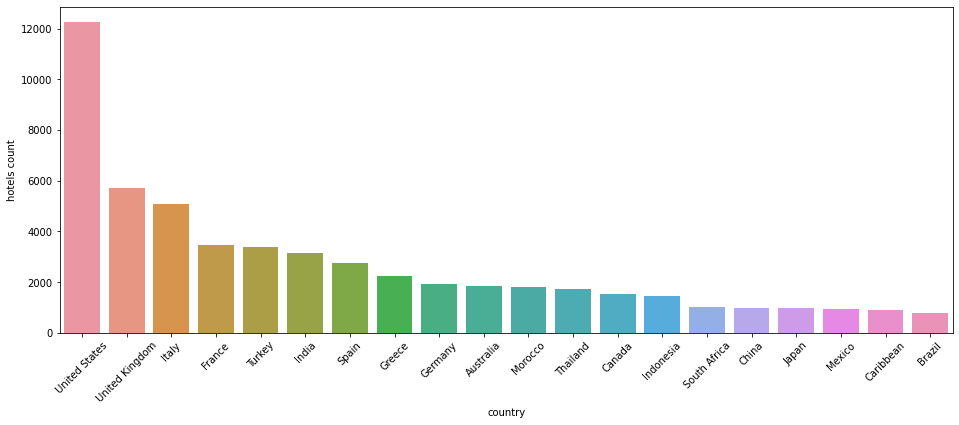

In [25]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'country' , y = 'hotels count', ax=ax, data=most_common_countries)
plt.xticks(rotation=45)
plt.show()

### 1.2. Distribution of hotels over Arabic countries

In [26]:
arabic_countries = [
    'Lebanon',
    'Iraq',
    'Jordan',
    'Egypt',
    'United Arab Emirates',
    'Morocco',
    'Tunisia',
    'Saudi Arabia',
    'Oman',
    'Bahrain',
    'Algeria',
    'Qatar',
    'Kuwait',
    'Libya',
    'South Sudan',
    'Sudan',
]

In [27]:
df_ = pd.DataFrame(df[df['country'] == 'Syria'])
for country in arabic_countries:
    df_ = df_.append(df[df['country'] == country])

In [28]:
arabic_most_common_countries = df_['country'].value_counts().reset_index().head(12)
arabic_most_common_countries.columns = ['country','hotels count']

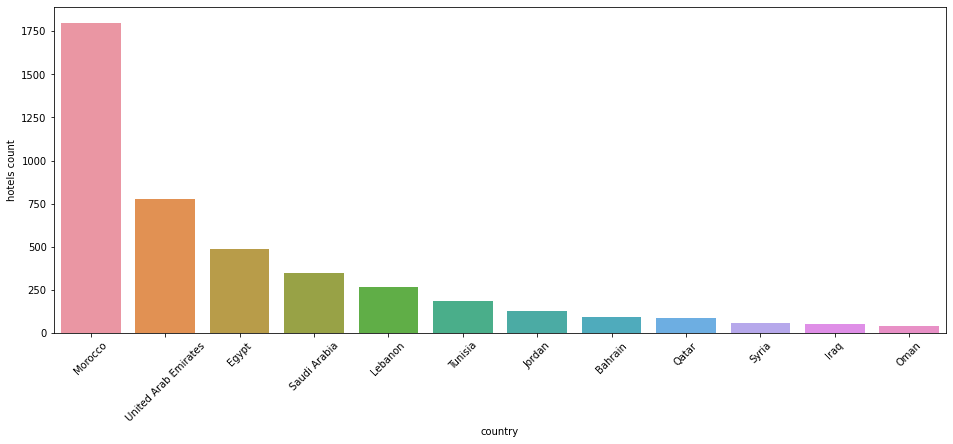

In [29]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'country' , y = 'hotels count', ax=ax, data=arabic_most_common_countries)
plt.xticks(rotation=45)
plt.show()

### 1.3. Distribution of star-rating

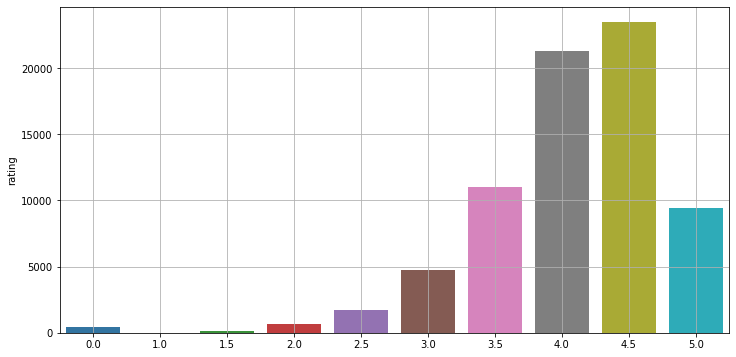

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = df.rating.value_counts().index , y = df.rating.value_counts(), ax=ax, data=df,)
plt.grid()

### 1.4. Distribution of guest-rating

In [12]:
ratings = pd.DataFrame.from_dict([eval(row) for row in df.reviews])

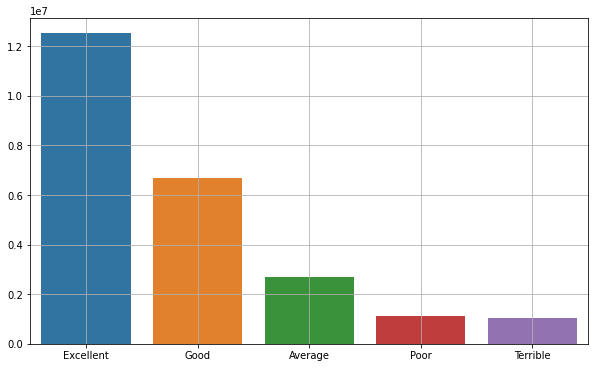

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = ratings.columns , y = ratings.sum(), ax=ax)
plt.grid()

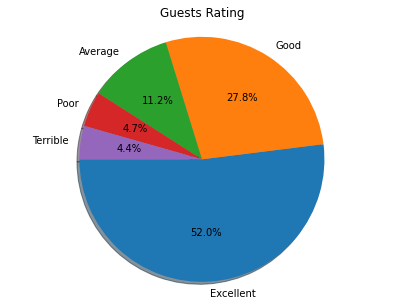

In [14]:
fig1, ax1 = plt.subplots(figsize =(7, 5))
ax1.pie(ratings.sum(), labels = ratings.columns, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
ax1.set_title('Guests Rating')
plt.show()

### 1.5. Most common amenities in hotels 

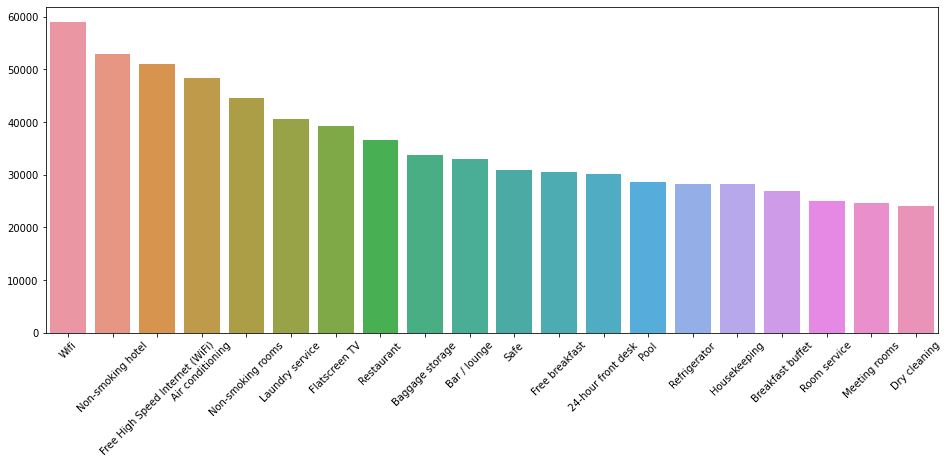

In [15]:
words , counts = most_common(df.amenities)
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x =  words, y = counts, ax=ax)
plt.xticks(rotation=45)
plt.show()

### 1.6. Most common amenities in rooms

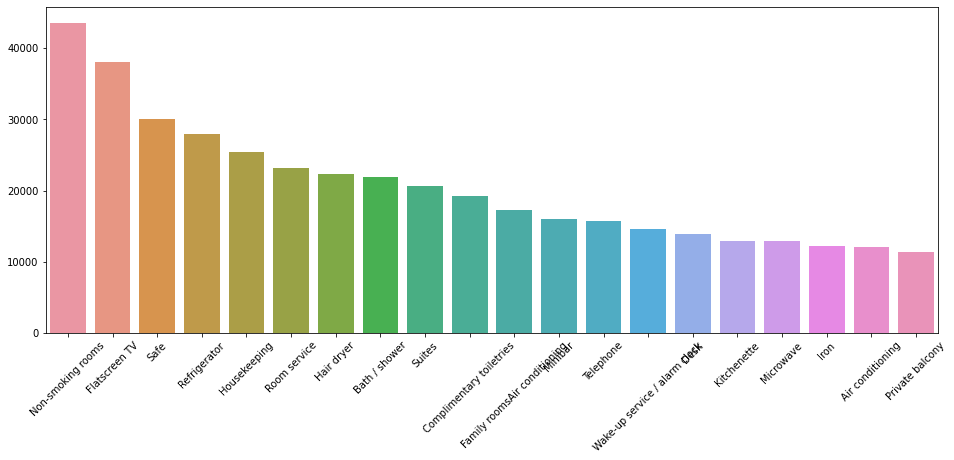

In [16]:
words , counts = most_common(df.rooms)
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x =  words, y = counts, ax=ax)
plt.xticks(rotation=45)
plt.show()

## 2. Restaurants Features Dataset 

In [30]:
df = pd.read_csv('/Users/osamaalhalabi/Desktop/Workstation/trips-planning-dataset/Restaurants_Features_Dataset.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [37]:
df.sample(2)

,name,features,cuisines,meals,special meals,official_description,rating,street,country,region,coords,image
173,The Grocery Cafe Restaurant,NaN,NaN,NaN,NaN,NaN,0.0,Skoufa 46 Kolonaki,Greece,Attica,"{'latitude': '37.98075', 'longitude': '23.7379'}",NaN
1656,Sushi Boky,"Takeout, Seating, Table Service, Serves Alcohol,","Asian, Thai,","Lunch, Dinner,","Vegetarian Friendly,",NaN,4.5,rue de Lausanne 20,Switzerland,NaN,"{'latitude': '46.211414', 'longitude': '6.1446...",https://media-cdn.tripadvisor.com/media/photo-...


### 2.1. Distribution of restaurants over countries

In [31]:
most_common_countries = df['country'].value_counts().reset_index().head(20)
most_common_countries.columns = ['country','hotels count']

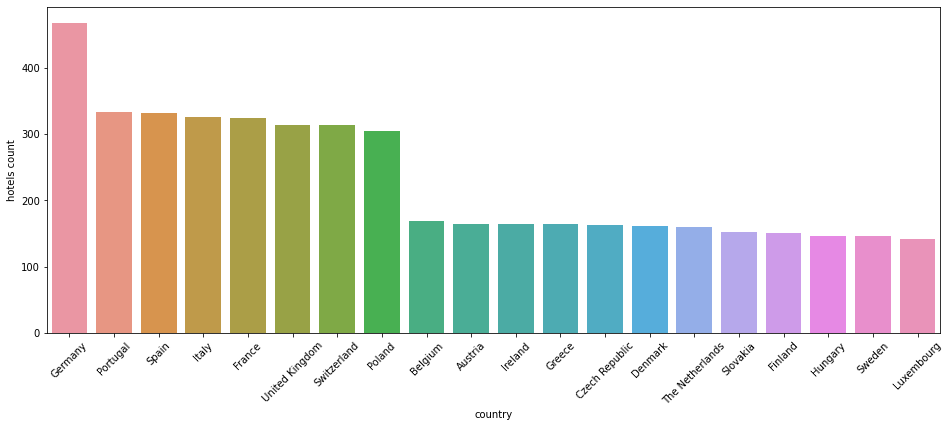

In [32]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'country' , y = 'hotels count', ax=ax, data=most_common_countries)
plt.xticks(rotation=45)
plt.show()

### 2.2. Distribution of restaurants over Arabic countries

In [33]:
arabic_countries = [
    'Lebanon',
    'Iraq',
    'Jordan',
    'Egypt',
    'United Arab Emirates',
    'Morocco',
    'Tunisia',
    'Saudi Arabia',
    'Oman',
    'Bahrain',
    'Algeria',
    'Qatar',
    'Kuwait',
    'Libya',
    'South Sudan',
    'Sudan',
]

In [34]:
df_ = pd.DataFrame(df[df['country'] == 'Syria'])
for country in arabic_countries:
    df_ = df_.append(df[df['country'] == country])

In [35]:
arabic_most_common_countries = df_['country'].value_counts().reset_index().head(12)
arabic_most_common_countries.columns = ['country','hotels count']

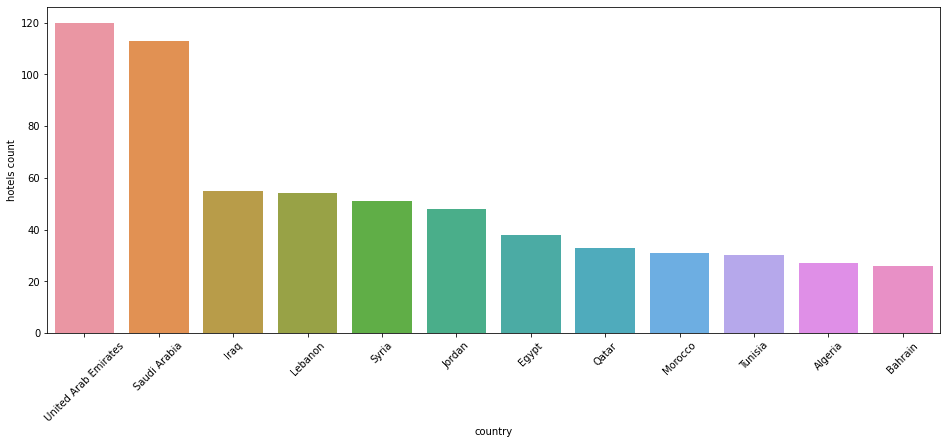

In [36]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'country' , y = 'hotels count', ax=ax, data=arabic_most_common_countries)
plt.xticks(rotation=45)
plt.show()

### 2.3. Most common features in restaurants 

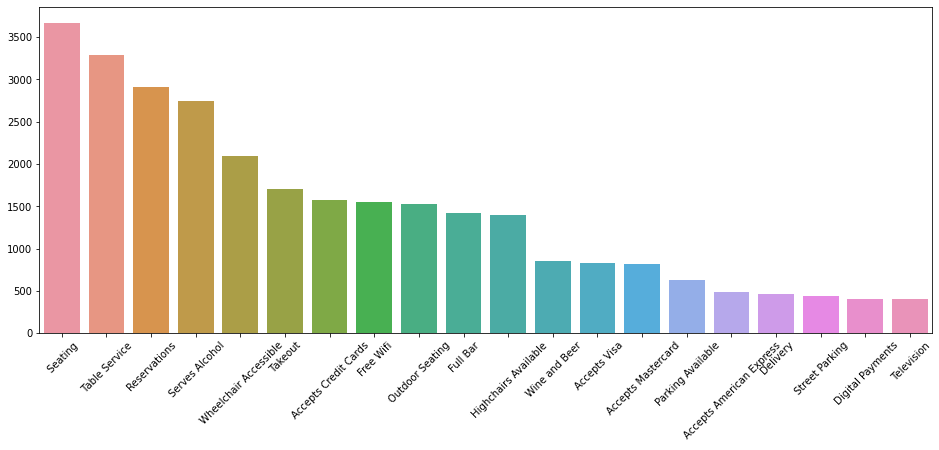

In [42]:
words , counts = most_common(df.features)
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x =  words, y = counts, ax=ax)
plt.xticks(rotation=45)
plt.show()

### 2.4. Most common cuisines in restaurants 

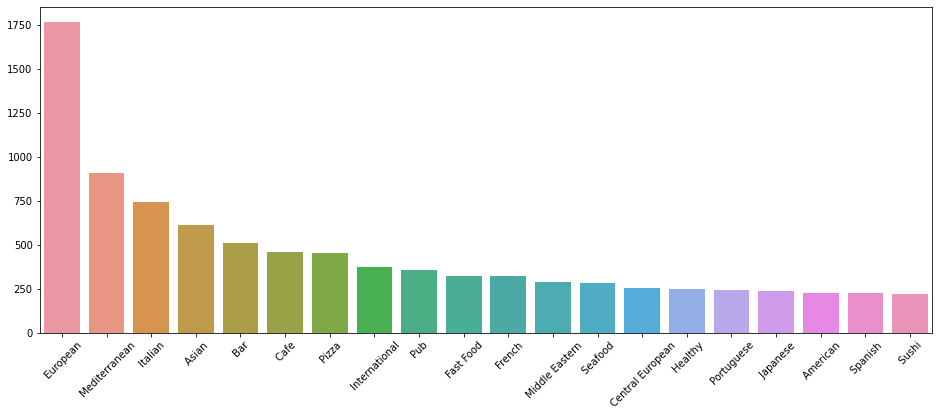

In [46]:
words , counts = most_common(df.cuisines)
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x =  words, y = counts, ax=ax)
plt.xticks(rotation=45)
plt.show()

### 2.5. Distribution of star-rating

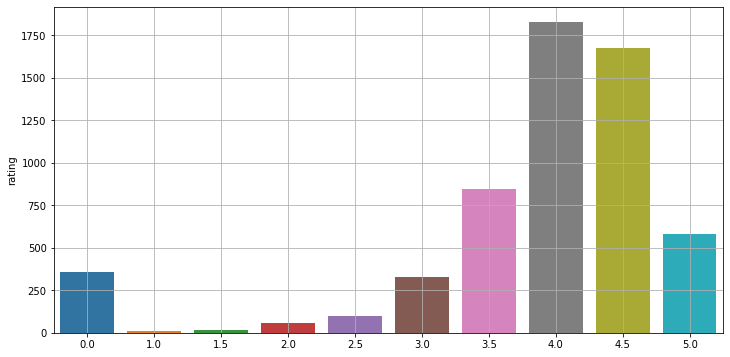

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = df.rating.value_counts().index , y = df.rating.value_counts(), ax=ax, data=df,)
plt.grid()